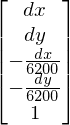

In [28]:
import sympy
from sympy import *
import numpy as np
init_printing(use_unicode=True)
from matplotlib import rc
import mpmath
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

d_1, d_2, f1, f2 = symbols('d_1 d_2 f_1 f_2')
dx, dy = symbols('dx, dy')
d_0 = symbols('d_{0}')
xi, yi, thxi, thyi = symbols('x y theta_x theta_y')

drift2 = Matrix([[1, 0, d_2,0,0], [0,1,0,d_2,0], [0,0,1,0,0], [0,0,0,1,0], [0,0,0,0,1]])
drift1 = Matrix([[1, 0, d_1,0,0], [0,1,0,d_1,0], [0,0,1,0,0], [0,0,0,1,0], [0,0,0,0,1]])
drift0 = Matrix([[1, 0, d_0,0,0], [0,1,0,d_0,0], [0,0,1,0,0], [0,0,0,1,0], [0,0,0,0,1]])
lens2 = Matrix([ [1,0,0,0,0],[0,1,0,0,0],[-1/f1,0,1,0,0], [0,-1/f1,0,1,0], [0,0,0,0,1] ])
lens1 = Matrix([ [1,0,0,0,dx],[0,1,0,0,dy],[-1/f1,0,1,0,0], [0,-1/f1,0,1,0], [0,0,0,0,1] ])

transport = lens2*drift1*lens1
vec = Matrix([ [xi], [yi], [thxi], [thyi], [1]])

vec_simple = Matrix([ [0], [0], [0], [0], [1]])

result = transport*vec
result
result.subs([ (f1,6200), (d_1,12503.4), (f2,6200), (d_2,6200)] )

#result.simplify

#transport

drift_max_d = 12501.7

comp_d = 6200

prior_d = 2394

(transport*vec_simple).subs([(f1,6200)])

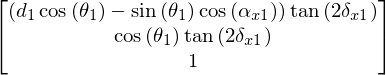

In [29]:
d_3 = symbols('d_3')

drift2 = Matrix([[1,d_2,0], [0,1,0], [0,0,1] ])
drift1 = Matrix([[1,d_1,0], [0,1,0], [0,0,1] ])
drift0 = Matrix([[1,d_0,0], [0,1,0], [0,0,1] ])
drift3 = Matrix([[1,d_3,0], [0,1,0], [0,0,1] ])

theta1, theta2 = symbols("theta_1 theta_2")

varx1, varx2 = symbols('delta_x1 delta_x2')
alpha1x, alpha2x = symbols('alpha_x1 alpha_x2')

tilt_m1 = Matrix([ [1,0,0], [0,1,tan (2*varx1) ], [0,0,1] ])

tilt_m2 = Matrix([ [1,0,0], [0,1,tan (2*varx2)], [0,0,1] ])

scale_x1 = Matrix([ [cos(alpha1x),0,0], [0,1,0 ], [0,0,1] ])

scale_x2 =Matrix([ [cos(alpha2x),0,0], [0,1,0 ], [0,0,1] ])

rot1 = Matrix([ [cos(theta1),-sin(theta1),0], [sin(theta1),cos(theta1),0 ], [0,0,1] ])
rot2 = Matrix([ [cos(theta2),-sin(theta2),0], [sin(theta2),cos(theta2), 0 ], [0,0,1] ])

vec_simple = Matrix([ [0], [0], [1]])
onemirror_system = drift1*scale_x1*rot1*tilt_m1*drift0

onemirror_system*vec_simple



In [33]:
(drift1, scale_x1, rot1, tilt_m1, drift0,onemirror_system)

print(latex(onemirror_system))

\left[\begin{matrix}d_{1} \sin{\left (\theta_{1} \right )} + \cos{\left (\alpha_{x1} \right )} \cos{\left (\theta_{1} \right )} & d_{1} \cos{\left (\theta_{1} \right )} + d_{0} \left(d_{1} \sin{\left (\theta_{1} \right )} + \cos{\left (\alpha_{x1} \right )} \cos{\left (\theta_{1} \right )}\right) - \sin{\left (\theta_{1} \right )} \cos{\left (\alpha_{x1} \right )} & \left(d_{1} \cos{\left (\theta_{1} \right )} - \sin{\left (\theta_{1} \right )} \cos{\left (\alpha_{x1} \right )}\right) \tan{\left (2 \delta_{x1} \right )}\\\sin{\left (\theta_{1} \right )} & d_{0} \sin{\left (\theta_{1} \right )} + \cos{\left (\theta_{1} \right )} & \cos{\left (\theta_{1} \right )} \tan{\left (2 \delta_{x1} \right )}\\0 & 0 & 1\end{matrix}\right]


In [60]:
drift2 = Matrix([[1,d_2,0], [0,1,0], [0,0,1] ])
drift1 = Matrix([[1,d_1,0], [0,1,0], [0,0,1] ])
drift0 = Matrix([[1,d_0,0], [0,1,0], [0,0,1] ])
lens2 = Matrix([[1,0,0], [-1/f1,1,0], [0,0,1] ])
lens1 = Matrix([[1,0,dx], [-1/f1,1,0], [0,0,1] ])

transport = drift2*lens2*drift1*lens1

vec = Matrix([ [xi],[thxi],[1]])

vec_simple = Matrix([ [0], [0], [1]])

result = transport*vec_simple

a=result.subs([ (f1,6200), (d_1,12503.4), (f2,6200), (d_2,1), (dx,5)] )

print(a)

Matrix([[6199/1240], [-1/1240], [1]])


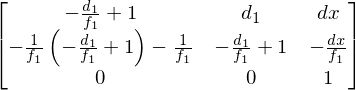

In [55]:
transport

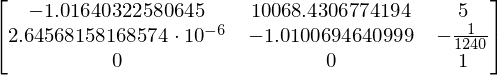

In [8]:
transport.subs([ (f1,6200), (d_0,prior_d), (d_1,drift_max_d), (f2,6200), (d_2,0), (dx,5)] )

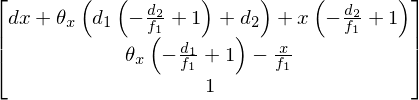

In [23]:
t = drift2*lens1*drift1

t.subs([(f1,6200), (d_2,6200), (d_1,6200),(dx,5)])

t*vec